In [19]:
import numpy as np
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
datos=[{"t":0,"N(t)":1000},
 {"t":10,"N(t)":809},
 {"t":22,"N(t)":564},
 {"t":33,"N(t)":480},
 {"t":40,"N(t)":370},
 {"t":50,"N(t)":285},
 {"t":60,"N(t)":199},
 {"t":70,"N(t)":169},
 {"t":80,"N(t)":131},
 {"t":99,"N(t)":101},
 {"t":111,"N(t)":70},
 {"t":110,"N(t)":54},
 {"t":133,"N(t)":42},
 {"t":130,"N(t)":32},
 {"t":140,"N(t)":25},
 {"t":166,"N(t)":21},
 {"t":177,"N(t)":16},
 {"t":170,"N(t)":13},
 {"t":199,"N(t)":9},
 {"t":200,"N(t)":7}]

In [138]:
t=[]
N=[]
for i in datos:
    t.append(i["t"])
    N.append(i["N(t)"])
df=pd.DataFrame({'t':t,'N':N})
df[['t','N']]

,t,N
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [139]:
def func(t, No, l):
    return No*np.exp(-l*t)
N,e=optimize.curve_fit(func,t,N)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4692\3220356605.py:2: RuntimeWarning: overflow encountered in exp
  return No*np.exp(-l*t)


In [140]:
No=N[0]
l=N[1]
E=np.sqrt(np.diag(e))
T=np.log(2)/l
eT=T*(E[1]/l)
print('No={:.2f}±{:.2f}, l={:.7f}±{:.7f}, T={:.4f}±{:.4f}'.format(No,E[0],l,E[1],T,eT) )

No=1012.95±11.59, l=0.0250744±0.0004577, T=27.6437±0.5046


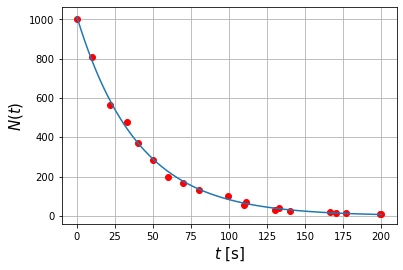

In [141]:
t=np.linspace(0,200,1000)
N_model=func(t,*N)
plt.plot(df.t,df.N,'ro')
plt.plot(t,N_model)
plt.xlabel('$t$ [s]',size=15 )
plt.ylabel('$N(t)$',size=15 )
plt.grid()